## Gradient descent in 1d: basic properties.

In [1]:
import numpy as np
import matplotlib.pylab as plt

An implementation of gradient descent for 1d functions.

In [2]:
class GradientDescent:
    def __init__(self, func, func_grad, theta0, alpha):
        """Basic implementation of 1d gradient descent.
        
        Args:
            func (function): 1d function we want to minimize.
            func_grad (function): gradient of func.
            theta0 (float): starting point.
            alpha (float): learning rate.
        """
        self.func = func
        self.func_grad = func_grad
        self.theta0 = theta0
        self.alpha = alpha
    
    def run(
        self,
        max_iter,
        plt_min,
        plt_max,
        plt_save
    ):
        """Runs gradient descent.
        
        Args:
            max_iter (int): max number of iterations.
            plt_min (float): min theta for plot.
            plt_max (float): max theta for plot.
            plt_save (str): path to save plot to.
        
        Returns:
            numpy.ndarray: array of all theta-values from start to end.
        """
        theta = self.theta0
        thetas = [self.theta0]

        iter_ = 0 # variable to keep track of number of iteration
        while iter_ <= max_iter:
            # Gradient descent update
            theta = theta - self.alpha * self.func_grad(theta)

            # Update number of iterations
            iter_ = iter_ + 1
            thetas.append(theta)
        
        self.thetas = np.array(thetas)

        self._plot(plt_min, plt_max, plt_save)
    
    def _plot(self, min_theta, max_theta, save_to):
        """Plots function and gradient descent steps as arrows.
        
        Args:
            min_theta (float): min theta for plot.
            max_theta (float): max theta for plot.
            save_to (str): path to save plot to.
        """
        plt.clf()
        
        # Plot function itself
        domain = np.linspace(min_theta, max_theta, 100)
        plt.plot(domain, self.func(domain), 'k--')
        
        # Plot starting point
        plt.plot(self.thetas[0], self.func(self.thetas[0]), 'r.', markersize=10)
        
        # Plot gradient descent steps as arrow
        fs = self.func(self.thetas)
        for arrow in zip(
            self.thetas[:-1],
            fs[:-1],
            self.thetas[1:] - self.thetas[:-1],
            fs[1:] - fs[:-1]
        ):
            plt.quiver(*arrow, color='r', angles='xy', scale_units='xy', scale=1)
        
        # Plot finishing point
        plt.plot(
            self.thetas[-1],
            self.func(self.thetas[-1]),
            'g.',
            markersize=10,
            label=r'$\theta_0={:1.2f}$, $\alpha={:1.3f}$'.format(self.thetas[0], self.alpha)
        )

        # Save plot
        plt.legend()
        plt.savefig(save_to)

We start by running gradient descent on a simple function: $J(\theta) = \theta^2$.

In [3]:
j2 = lambda theta: theta**2
j2_grad = lambda theta: 2*theta

 The starting point is $\theta = 2$ and the learning rate is $\lambda = 0.1$. We see that gradient descent moves us towards the minimum $\theta=0$. Even though the learning rate is constant, the arrows keep getting smaller and smaller. The reason is that the closer to the minimum we get, the smaller the gradient becomes: from $\theta = 2$ we would take a step of size $-\lambda J'(2) = -0.4$, while from $\theta = 0.5$ the step size would only be $-0.1$.

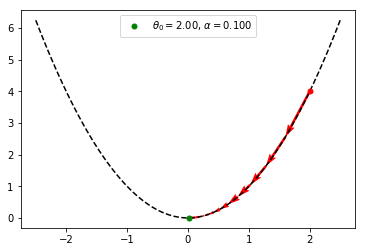

In [4]:
gd2 = GradientDescent(j2, j2_grad, theta0=2, alpha=0.1)
gd2.run(max_iter=20, plt_min=-2.5, plt_max=2.5, plt_save='gd2.pdf')

We should be careful not to make $\lambda$ too small because it will take a lot longer to converge. In the example below, we set $\lambda=0.02$ and use the same number of steps as above.

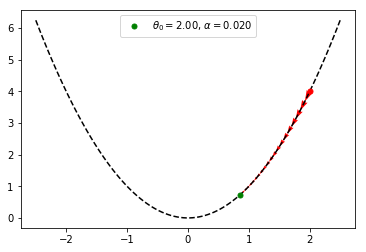

In [5]:
gd2_slow = GradientDescent(j2, j2_grad, theta0=2, alpha=0.02)
gd2_slow.run(max_iter=20, plt_min=-2.5, plt_max=2.5, plt_save='gd2_slow.pdf')

We should also be careful not to make $\lambda$ too large because gradient descent might not converge at all. Below we start from $\theta=0.5$ and use $\lambda = 1.1$. The first step overshoots the minimum $\theta=0$ and ends up at $\theta=-0.6$, where the gradient is even higher. This keeps on repeating and the steps keeps getting larger and larger.

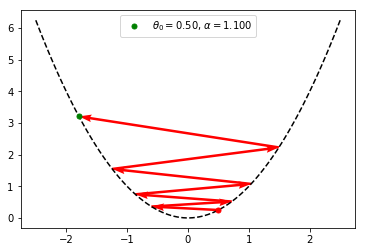

In [6]:
gd2_overshoot= GradientDescent(j2, j2_grad, theta0=0.5, alpha=1.1)
gd2_overshoot.run(max_iter=6, plt_min=-2.5, plt_max=2.5, plt_save='gd2_overshoot.pdf')

In order to make sure gradient descent is not diverging or converging too slowly, we can plot the value of the cost function $J$ as a function of the number of steps. If $J$ is decreasing too slowly, we can try increasing $\lambda$. If $J$ is increasing, we can try decreasing $J$. Note that With a sufficiently small value of $\lambda$, $J$ should decrease at *every* step.

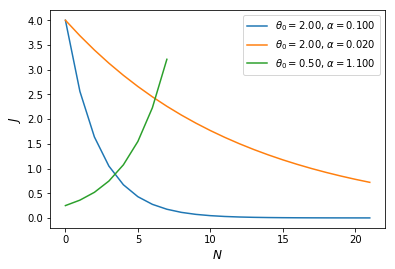

In [7]:
def plot_progress(gd_runs, save_to):
    for gd in gd_runs:
        plt.plot(
            list(range(len(gd.thetas))),
            gd.func(gd.thetas),
            label=r'$\theta_0={:1.2f}$, $\alpha={:1.3f}$'.format(gd.theta0, gd.alpha)
        )

    plt.xlabel(r'$N$', fontsize=12)
    plt.ylabel(r'$J$', fontsize=12)
    plt.legend()
    plt.savefig(save_to)

plot_progress([gd2, gd2_slow, gd2_overshoot], 'gd2_progress.pdf')

Let's now move to a more complicated function: $J(\theta) = \frac{12}{5} \theta^4 + \frac{4}{5} \theta^3 - \frac{18}{5} \theta^2 + 2$. This function has a global minimum at $\theta=-1$, and a local one at $\theta=+3/4$. Which one will gradient descent converge to? That depends on the starting point.

In [8]:
j4 = lambda theta: 12/5.*theta**4 + 4/5.*theta**3 - 18/5.*theta**2 + 2
j4_grad = lambda theta: 48/5.*theta**3 + 12/5.*theta**2 - 36/5.*theta

Here we start at $\theta=+1.4$ and converge to the local minima.

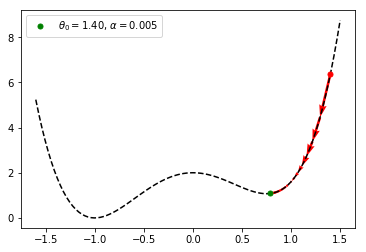

In [9]:
gd4_local = GradientDescent(j4, j4_grad, theta0=1.4, alpha=0.005)
gd4_local.run(max_iter=30, plt_min=-1.6, plt_max=1.5, plt_save='gd4_local.pdf')

Below we start at $\theta=-1.5$ and converge to the global minima.

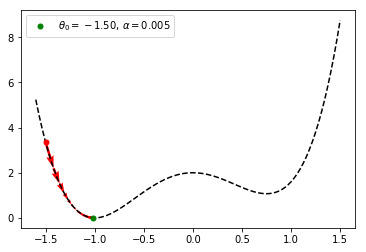

In [10]:
gd4_global = GradientDescent(j4, j4_grad, theta0=-1.5, alpha=0.005)
gd4_global.run(max_iter=30, plt_min=-1.6, plt_max=1.5, plt_save='gd4_global.pdf')

Another interesting feature of $J(\theta)$ is that it has a local maxima at $\theta=0$. If we initialize gradient descent at $\theta=0$, it will not make any progress at all, since $J'(0)=0$. Even if we initialize close to the local maxima, progress will be very slow. This is because $J'(\theta)$ is small and gradient descent will take small steps. Below we keep the learning rate the same, start at $\theta=-0.01$ (so just to the left of the local maxima), and tripled the number of iterations. Even with many more steps, gradient descent is not close to the global minima. 

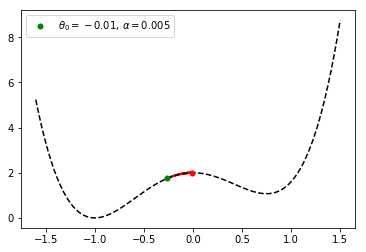

In [11]:
gd4_slow = GradientDescent(j4, j4_grad, theta0=-0.01, alpha=0.005)
gd4_slow.run(max_iter=90, plt_min=-1.6, plt_max=1.5, plt_save='gd4_slow.pdf')

Plotting $J$ as a function of the number of iterations summarizes the importance of intialization:

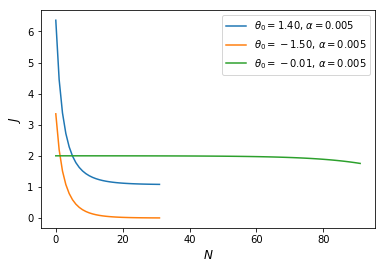

In [12]:
plot_progress([gd4_local, gd4_global, gd4_slow], 'gd4_progress.pdf')